### Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

### Pre Processing Data

In [2]:
#Import Data
df = pd.read_excel('Data Analisis.xlsx')
df.head()

,Provinsi,Strerilisasi Wanita/ Tubektomi/ MOW,Strerilisasi Pria/ Vasektomi/ MOP,IUD/ AKDR/ Spiral,Suntikan,Susuk KB/ Implan,Pil,Kondom Pria/ Karet KB,Intravag/ Kondom Wanita/ Diafragma,Metode Menyusui Alami,Pantang Berkala/ Kalender,Lainnya
0,Aceh,2.36,0.18,4.43,67.31,5.41,16.76,1.31,0.09,0.15,1.60,0.40
1,Sumatera Utara,8.87,0.41,3.81,42.55,16.20,16.00,8.87,0.08,0.20,1.85,1.14
2,Sumatera Barat,6.15,0.67,10.22,45.15,13.61,11.98,9.39,1.10,0.46,1.62,0.66
3,Riau,3.21,0.19,4.17,55.76,8.13,24.36,1.38,0.07,0.18,1.78,0.76
4,Jambi,1.85,0.12,3.03,61.85,9.51,21.61,1.20,1.10,0.04,6.62,0.09


In [3]:
#Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Provinsi                             34 non-null     object 
 1   Strerilisasi Wanita/ Tubektomi/ MOW  34 non-null     float64
 2   Strerilisasi Pria/ Vasektomi/ MOP    34 non-null     float64
 3   IUD/ AKDR/ Spiral                    34 non-null     float64
 4   Suntikan                             34 non-null     float64
 5   Susuk KB/ Implan                     34 non-null     float64
 6   Pil                                  34 non-null     float64
 7   Kondom Pria/ Karet KB                34 non-null     float64
 8   Intravag/ Kondom Wanita/ Diafragma   34 non-null     float64
 9   Metode Menyusui Alami                34 non-null     float64
 10  Pantang Berkala/ Kalender            34 non-null     float64
 11  Lainnya                           

In [4]:
#Drop kolom yang tidak digunakan
data = df.drop(columns=['Lainnya'])

In [5]:
#Cek Data Duplikat
data.duplicated().sum()

0

In [6]:
# Cek Missing Value
data.isna().sum()/len(data)*100

Provinsi                               0.0
Strerilisasi Wanita/ Tubektomi/ MOW    0.0
Strerilisasi Pria/ Vasektomi/ MOP      0.0
IUD/ AKDR/ Spiral                      0.0
Suntikan                               0.0
Susuk KB/ Implan                       0.0
Pil                                    0.0
Kondom Pria/ Karet KB                  0.0
Intravag/ Kondom Wanita/ Diafragma     0.0
Metode Menyusui Alami                  0.0
Pantang Berkala/ Kalender              0.0
dtype: float64

In [7]:
# cek apakah terdapat nilai yang negatif
# Looping untuk setiap kolom dalam DataFrame
for column in data.columns:
    # Memilih kolom numerik saja
    if pd.api.types.is_numeric_dtype(data[column]):
        numerical_values = data[column]
        
        # Mencari nilai yang negatif
        negative_values = numerical_values[numerical_values < 0].dropna()
        
        # Menampilkan hasil
        if not negative_values.empty:
            print(f"Kolom '{column}' memiliki nilai negatif:")
            print(negative_values)
            
        # Jika tidak ada nilai negatif
        if negative_values.empty:
            print(f"Tidak ada nilai negatif dalam kolom '{column}'.")

Tidak ada nilai negatif dalam kolom 'Strerilisasi Wanita/ Tubektomi/ MOW'.
Tidak ada nilai negatif dalam kolom 'Strerilisasi Pria/ Vasektomi/ MOP'.
Tidak ada nilai negatif dalam kolom 'IUD/ AKDR/ Spiral'.
Tidak ada nilai negatif dalam kolom 'Suntikan'.
Tidak ada nilai negatif dalam kolom 'Susuk KB/ Implan'.
Tidak ada nilai negatif dalam kolom 'Pil'.
Tidak ada nilai negatif dalam kolom 'Kondom Pria/ Karet KB'.
Tidak ada nilai negatif dalam kolom 'Intravag/ Kondom Wanita/ Diafragma'.
Tidak ada nilai negatif dalam kolom 'Metode Menyusui Alami'.
Tidak ada nilai negatif dalam kolom 'Pantang Berkala/ Kalender'.


### Exploratory Data Analysis

In [8]:
# Statistika deskriptif
data_descriptive_stats = data.describe()
data_descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Strerilisasi Wanita/ Tubektomi/ MOW,34.0,4.169118,2.898078,1.34,1.9175,3.045,5.5325,10.53
Strerilisasi Pria/ Vasektomi/ MOP,34.0,0.246176,0.154449,0.00,0.1475,0.205,0.3425,0.67
IUD/ AKDR/ Spiral,34.0,7.417353,6.496624,1.38,3.6150,4.925,8.8375,28.96
Suntikan,34.0,53.178824,10.707090,28.55,43.1750,53.950,61.7650,72.20
Susuk KB/ Implan,34.0,12.086471,6.672543,3.23,6.9250,10.535,16.2750,30.44
Pil,34.0,18.234412,7.891668,6.52,12.0975,17.200,24.3500,40.36
Kondom Pria/ Karet KB,34.0,3.765588,3.336711,0.02,1.2150,2.395,5.5775,12.55
Intravag/ Kondom Wanita/ Diafragma,34.0,0.329412,0.617144,0.00,0.0100,0.060,0.0900,2.24
Metode Menyusui Alami,34.0,0.232353,0.457079,0.00,0.0325,0.130,0.2075,2.62
Pantang Berkala/ Kalender,34.0,3.877941,3.043702,1.00,1.6125,2.175,6.6425,9.99


#### Visualisasi

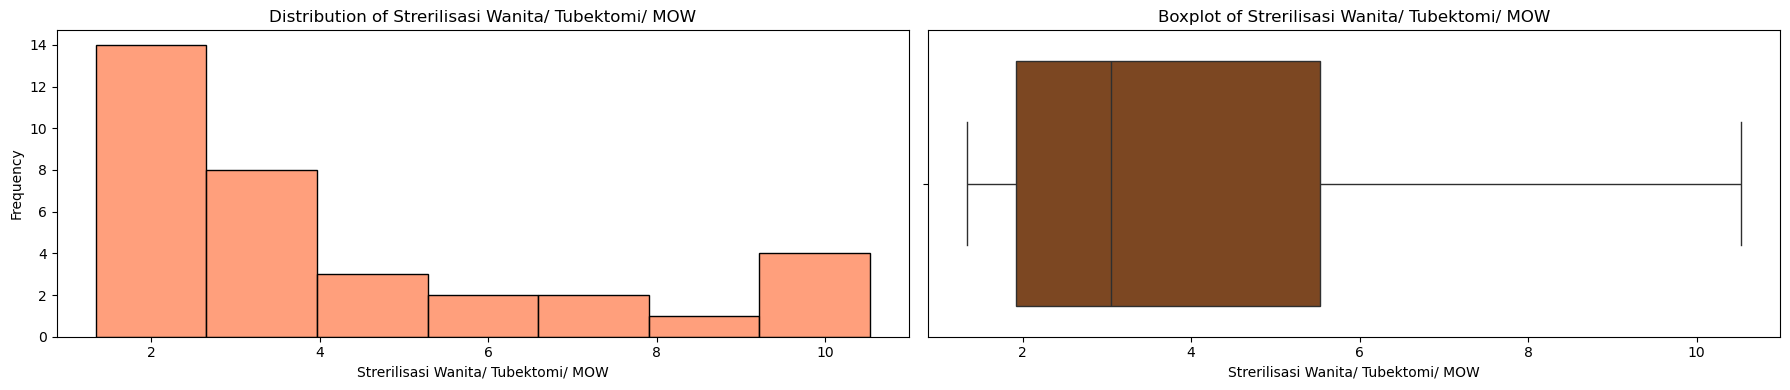

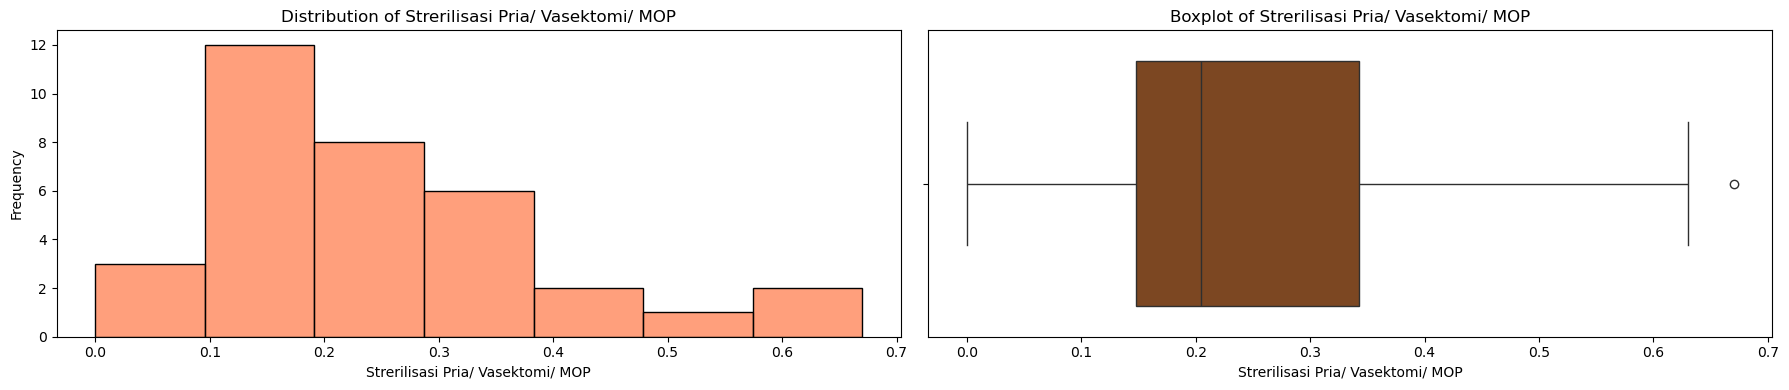

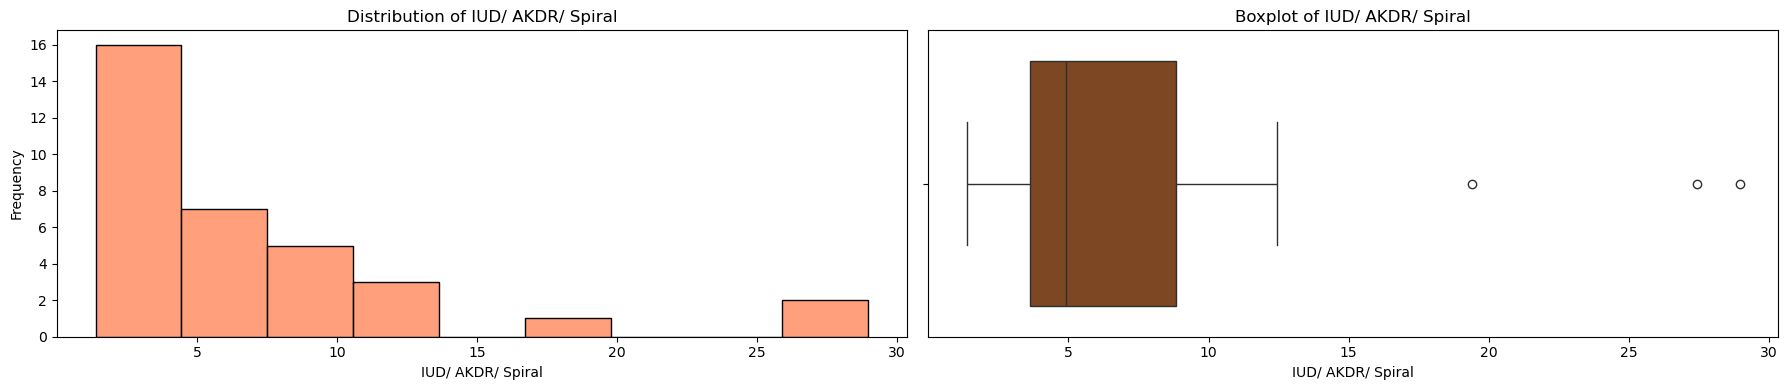

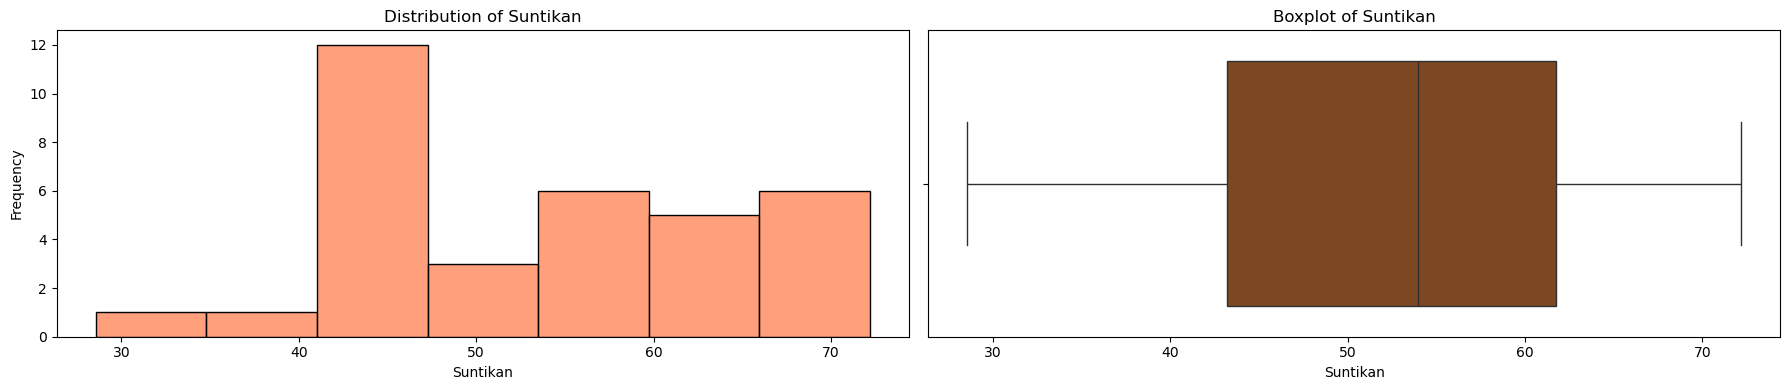

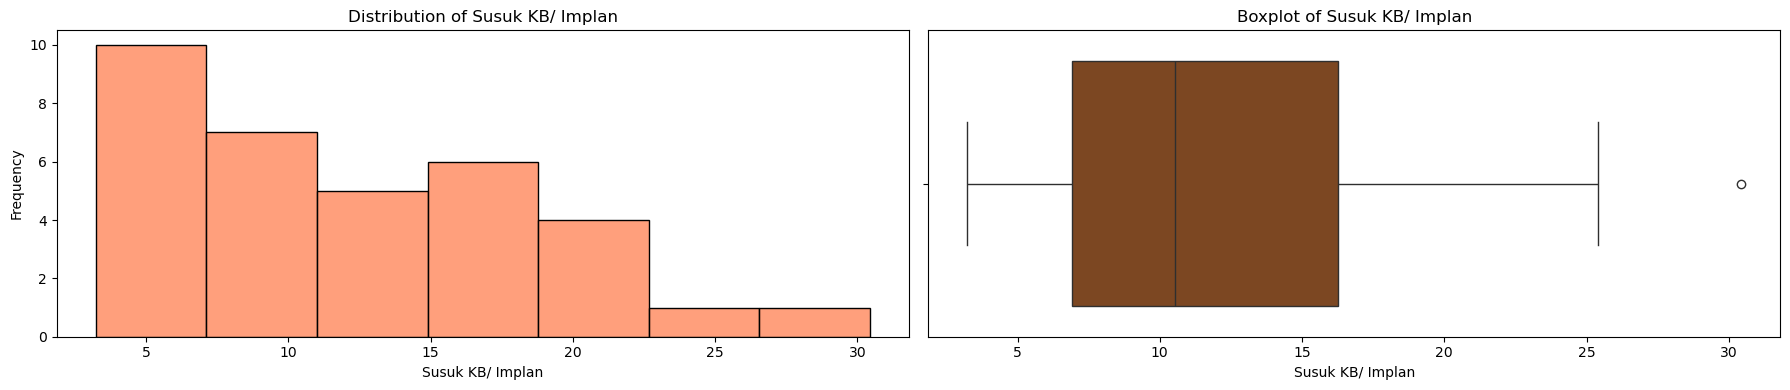

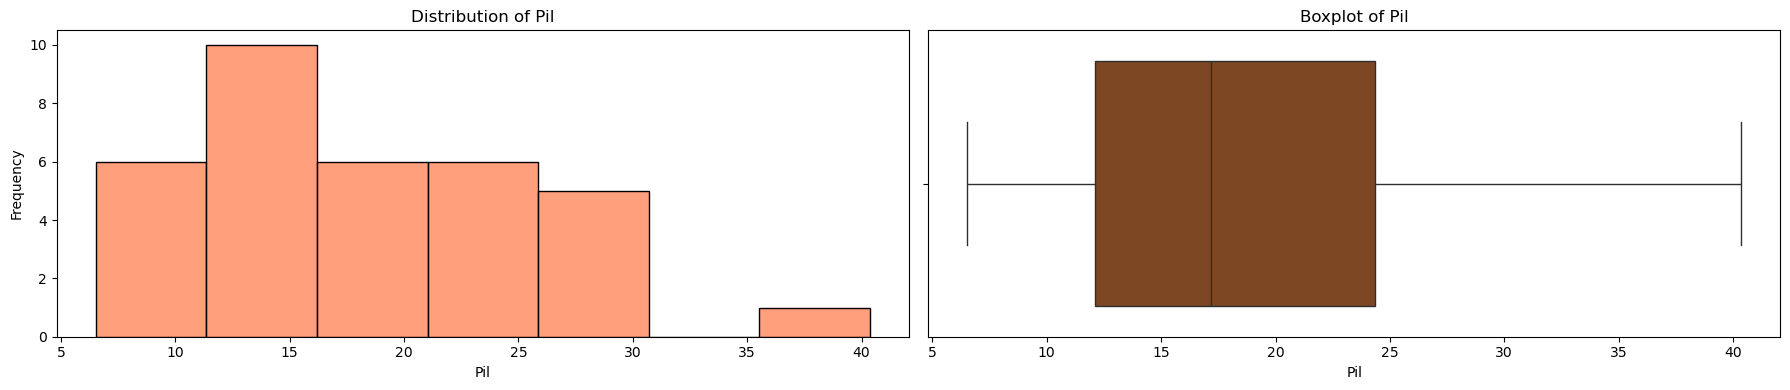

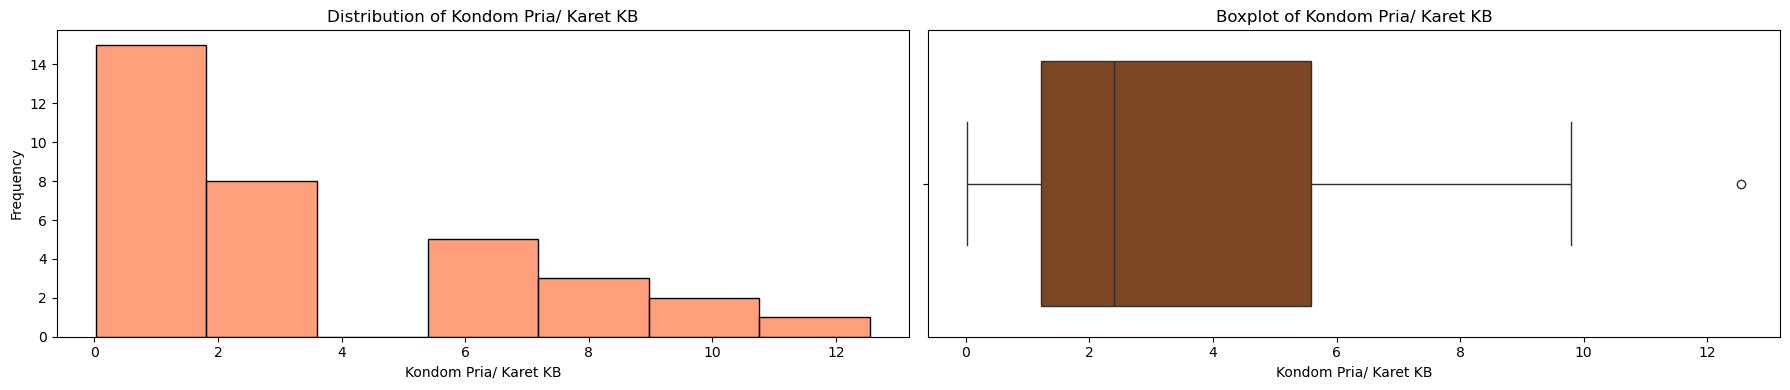

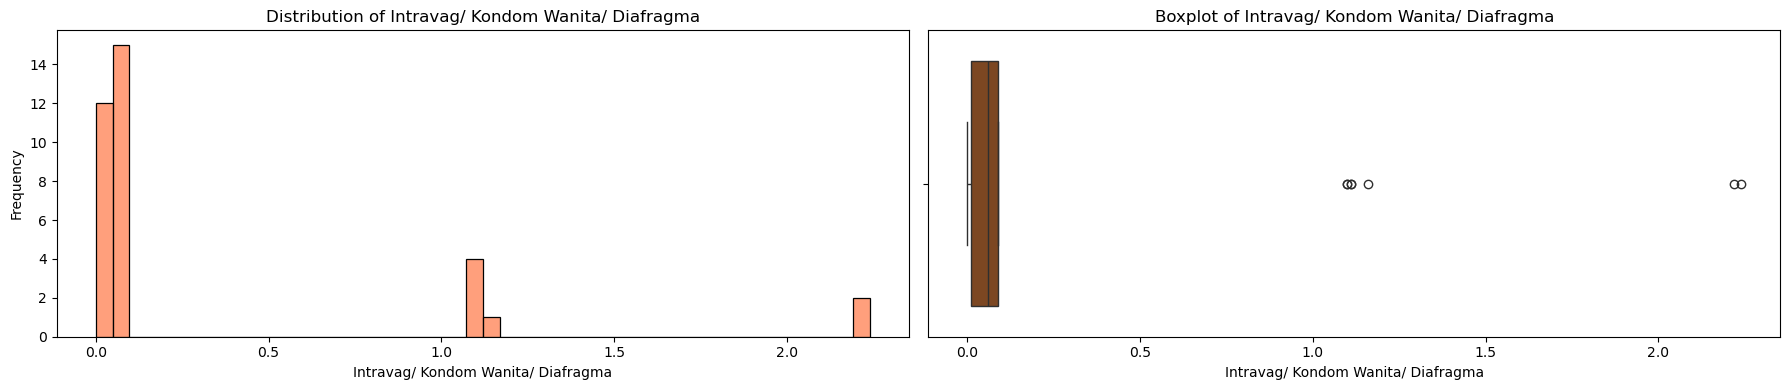

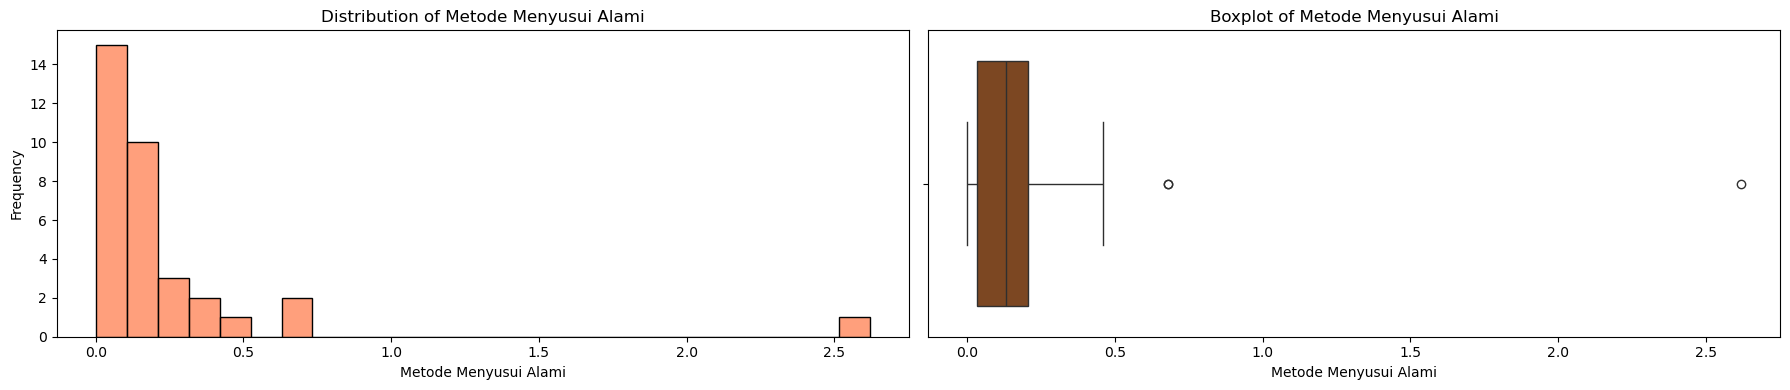

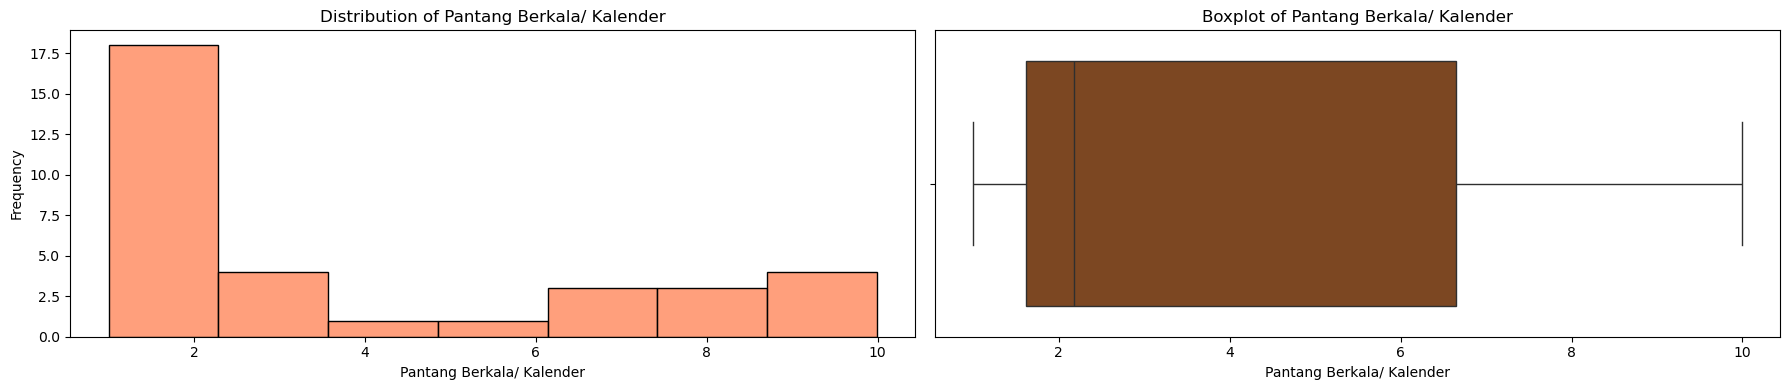

In [9]:
num_columns = data.select_dtypes(include=['number']).columns
for column in num_columns :
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

    # Histogram 
    sns.histplot(data[column], kde=False, color='coral', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=data[column], color='saddlebrown', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

### Mapping

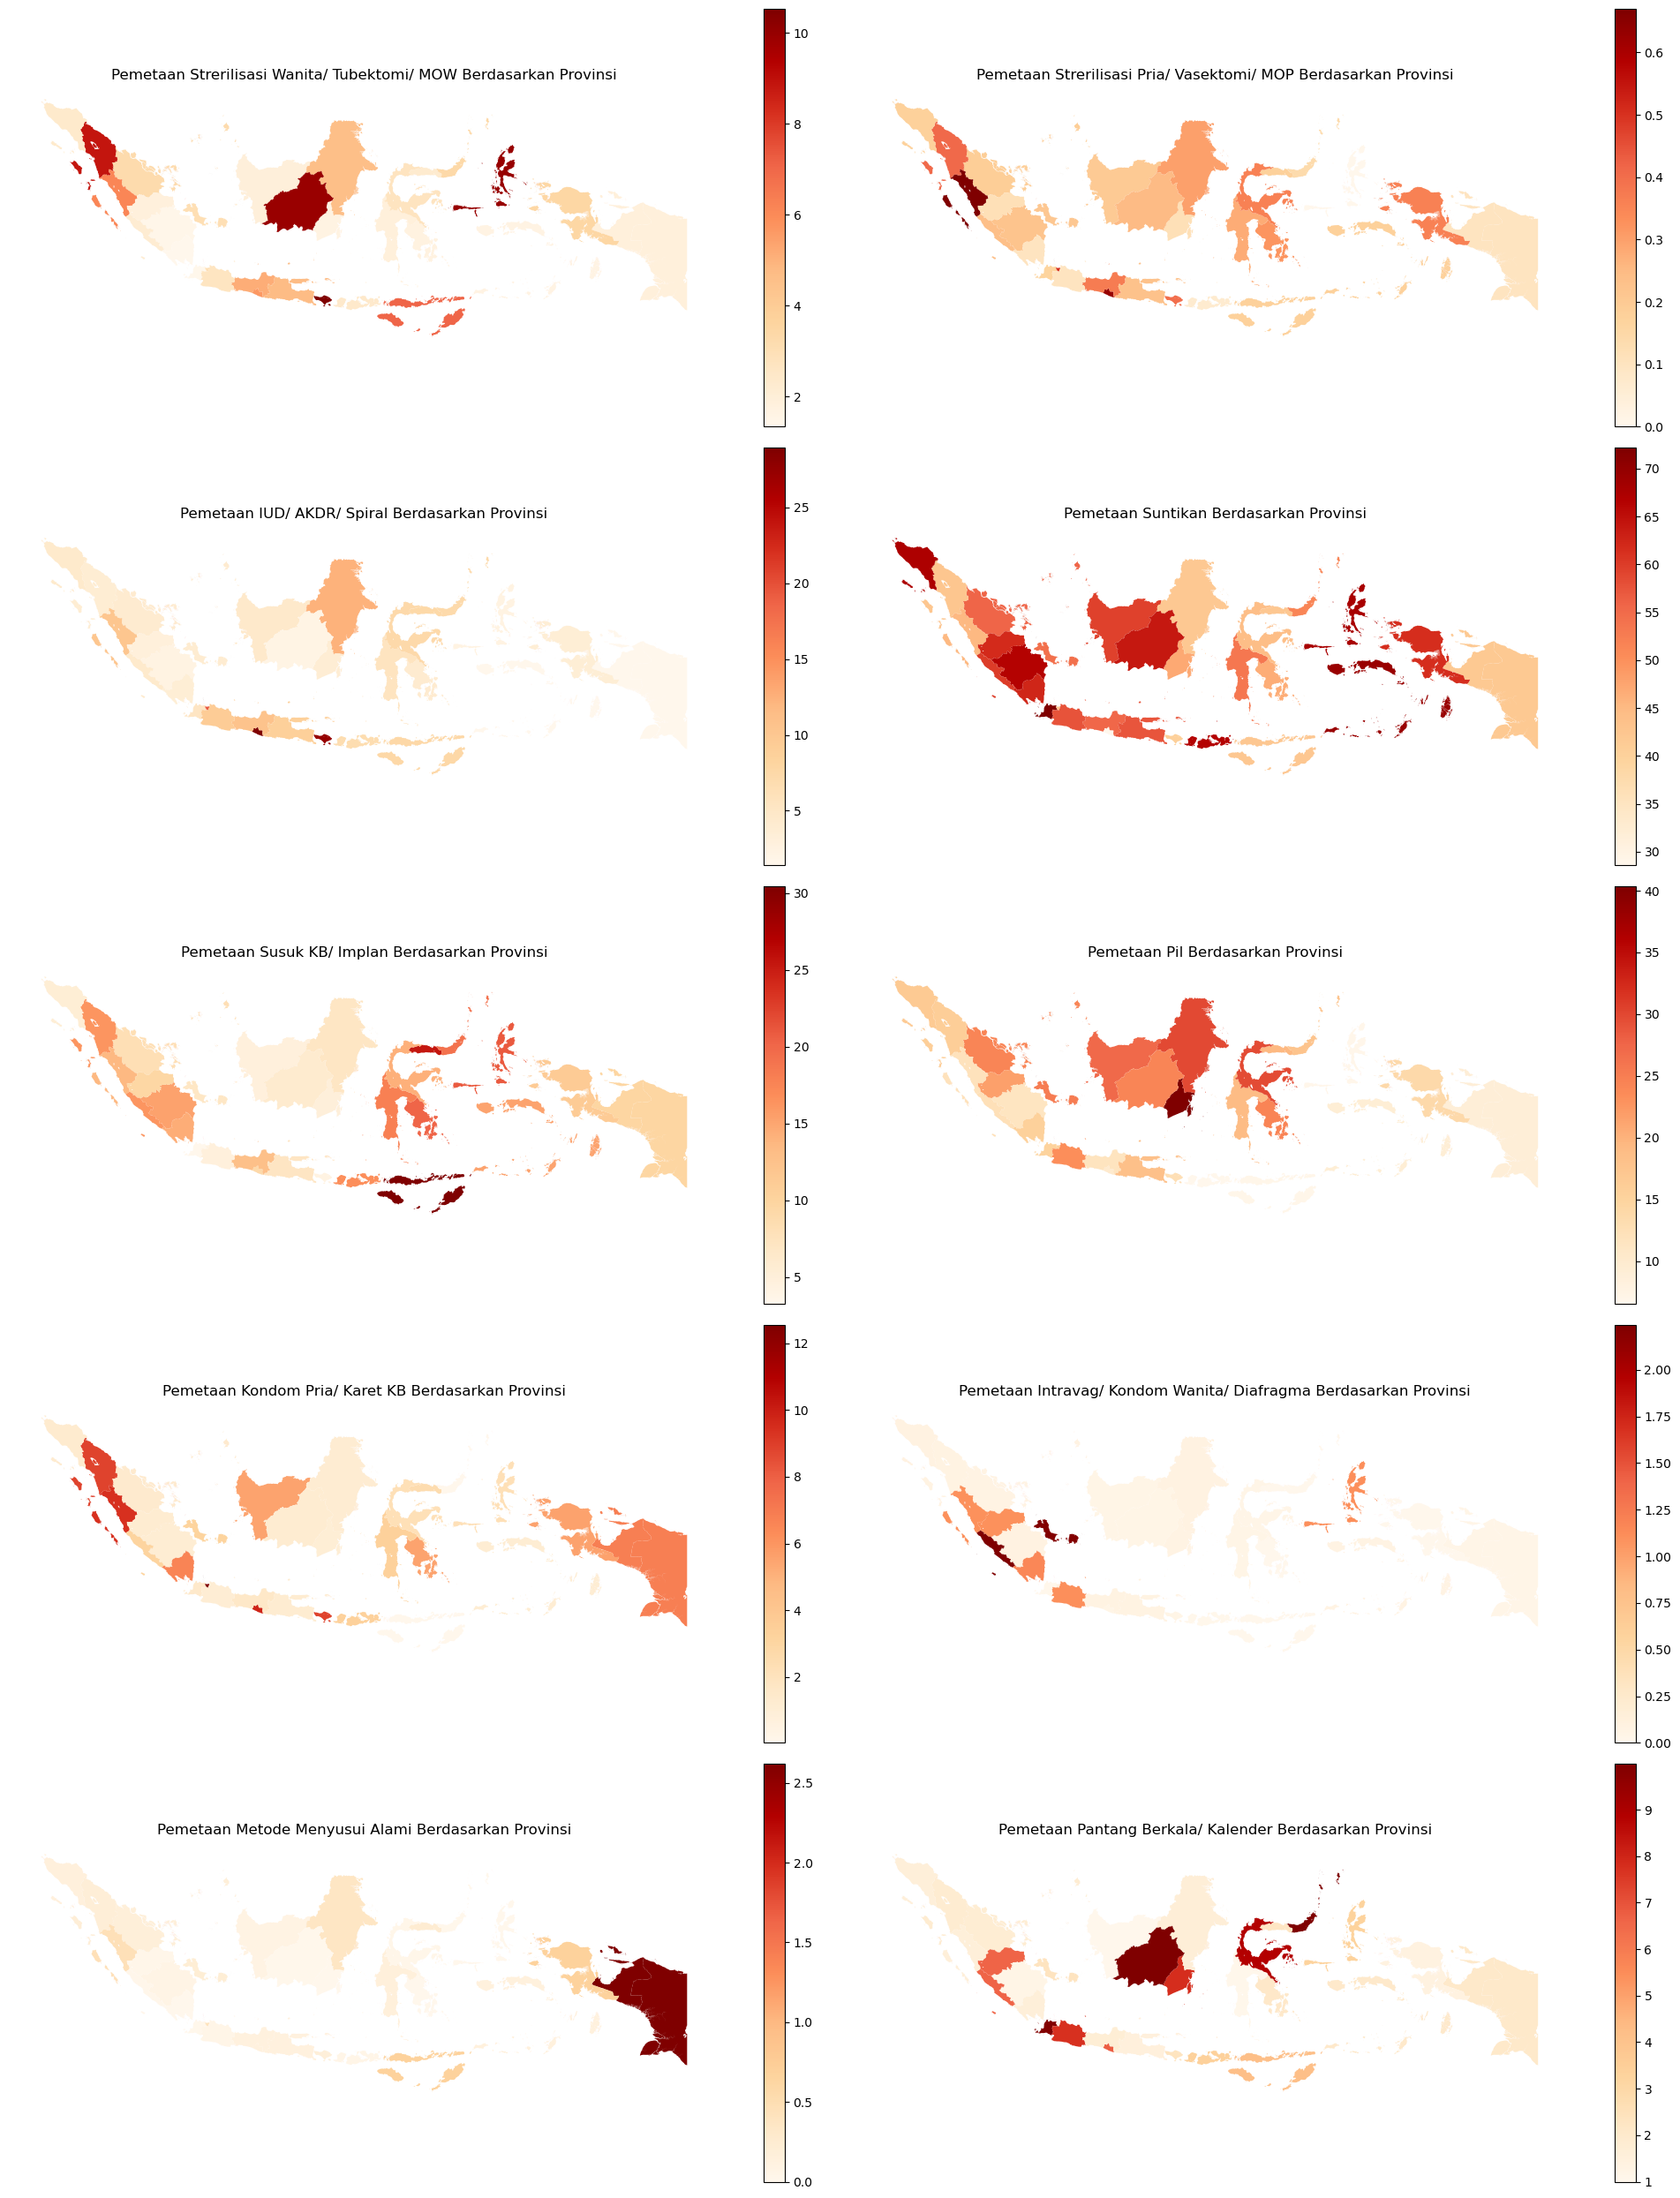

In [10]:
### Mapping
# !pip install geopandas

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Baca data geospasial untuk provinsi di Indonesia
gdf = gpd.read_file('https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json')
gdf['Propinsi'] = gdf['Propinsi'].str.lower() 

# Dictionary untuk mapping dari nama lama ke nama baru
mapping = {
    'irian jaya timur': 'Papua',
    'nusatenggara barat': 'Nusa Tenggara Barat',
    'gorontalo': 'Gorontalo',
    'sulawesi tenggara': 'Sulawesi Tenggara',
    'daerah istimewa yogyakarta': 'DI Yogyakarta',
    'jawa tengah': 'Jawa Tengah',
    'probanten': 'Banten',
    'jawa timur': 'Jawa Timur',
    'maluku utara': 'Maluku Utara',
    'maluku': 'Maluku',
    'kalimantan selatan': 'Kalimantan Selatan',
    'kalimantan barat': 'Kalimantan Barat',
    'sulawesi selatan': 'Sulawesi Selatan',
    'dki jakarta': 'DKI Jakarta',
    'jawa barat': 'Jawa Barat',
    'irian jaya tengah': 'Papua',
    'nusa tenggara timur': 'Nusa Tenggara Timur',
    'bali': 'Bali',
    'riau': 'Riau',
    'sulawesi tengah': 'Sulawesi Tengah',
    'kalimantan timur': 'Kalimantan Timur',
    'sulawesi utara': 'Sulawesi Utara',
    'irian jaya barat': 'Papua Barat',
    'sumatera utara': 'Sumatera Utara',
    'bangka belitung': 'Kep. Bangka Belitung',
    'sumatera barat': 'Sumatera Barat',
    'kalimantan tengah': 'Kalimantan Tengah',
    'sumatera selatan': 'Sumatera Selatan',
    'jambi': 'Jambi',
    'lampung': 'Lampung',
    'bengkulu': 'Bengkulu',
    'di. aceh': 'Aceh'
}

# Menggunakan metode replace untuk melakukan renaming
gdf['Propinsi'] = gdf['Propinsi'].replace(mapping)

gdf['Propinsi'] = gdf['Propinsi'].str.lower()
data['Provinsi'] = data['Provinsi'].str.lower()

# Gabungkan data numerik dengan data geospasial
merged = gdf.merge(data, left_on='Propinsi', right_on='Provinsi', how='left')

# Gantikan nilai yang hilang dengan 0
merged = merged.fillna(0)

# Tentukan kolom-kolom yang ingin diplot
variables = ['Strerilisasi Wanita/ Tubektomi/ MOW',
             'Strerilisasi Pria/ Vasektomi/ MOP', 
             'IUD/ AKDR/ Spiral', 
             'Suntikan', 
             'Susuk KB/ Implan', 
             'Pil', 
             'Kondom Pria/ Karet KB',
             'Intravag/ Kondom Wanita/ Diafragma', 
             'Metode Menyusui Alami',
             'Pantang Berkala/ Kalender']

# Plot semua variabel dalam satu tabel
fig, axes = plt.subplots(5, 2, figsize=(20, 25))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    merged.plot(column=var, ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"})
    ax.set_title(f'Pemetaan {var} Berdasarkan Provinsi')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Variance 

In [11]:
# Menghitung variansi antar variabel
numerical_data = data.select_dtypes(include=[float, int])
variances = numerical_data .var(ddof=1)

variances_df = pd.DataFrame(np.outer(variances, variances),
                            index=numerical_data.columns,
                            columns=numerical_data.columns).round(2)

variances_df

,Strerilisasi Wanita/ Tubektomi/ MOW,Strerilisasi Pria/ Vasektomi/ MOP,IUD/ AKDR/ Spiral,Suntikan,Susuk KB/ Implan,Pil,Kondom Pria/ Karet KB,Intravag/ Kondom Wanita/ Diafragma,Metode Menyusui Alami,Pantang Berkala/ Kalender
Strerilisasi Wanita/ Tubektomi/ MOW,70.54,0.20,354.48,962.86,373.94,523.07,93.51,3.20,1.75,77.81
Strerilisasi Pria/ Vasektomi/ MOP,0.20,0.00,1.01,2.73,1.06,1.49,0.27,0.01,0.00,0.22
IUD/ AKDR/ Spiral,354.48,1.01,1781.36,4838.58,1879.14,2628.53,469.91,16.07,8.82,391.00
Suntikan,962.86,2.73,4838.58,13142.74,5104.18,7139.71,1276.38,43.66,23.95,1062.06
Susuk KB/ Implan,373.94,1.06,1879.14,5104.18,1982.28,2772.81,495.70,16.96,9.30,412.46
Pil,523.07,1.49,2628.53,7139.71,2772.81,3878.60,693.39,23.72,13.01,576.95
Kondom Pria/ Karet KB,93.51,0.27,469.91,1276.38,495.70,693.39,123.96,4.24,2.33,103.14
Intravag/ Kondom Wanita/ Diafragma,3.20,0.01,16.07,43.66,16.96,23.72,4.24,0.15,0.08,3.53
Metode Menyusui Alami,1.75,0.00,8.82,23.95,9.30,13.01,2.33,0.08,0.04,1.94
Pantang Berkala/ Kalender,77.81,0.22,391.00,1062.06,412.46,576.95,103.14,3.53,1.94,85.82


### Korelasi

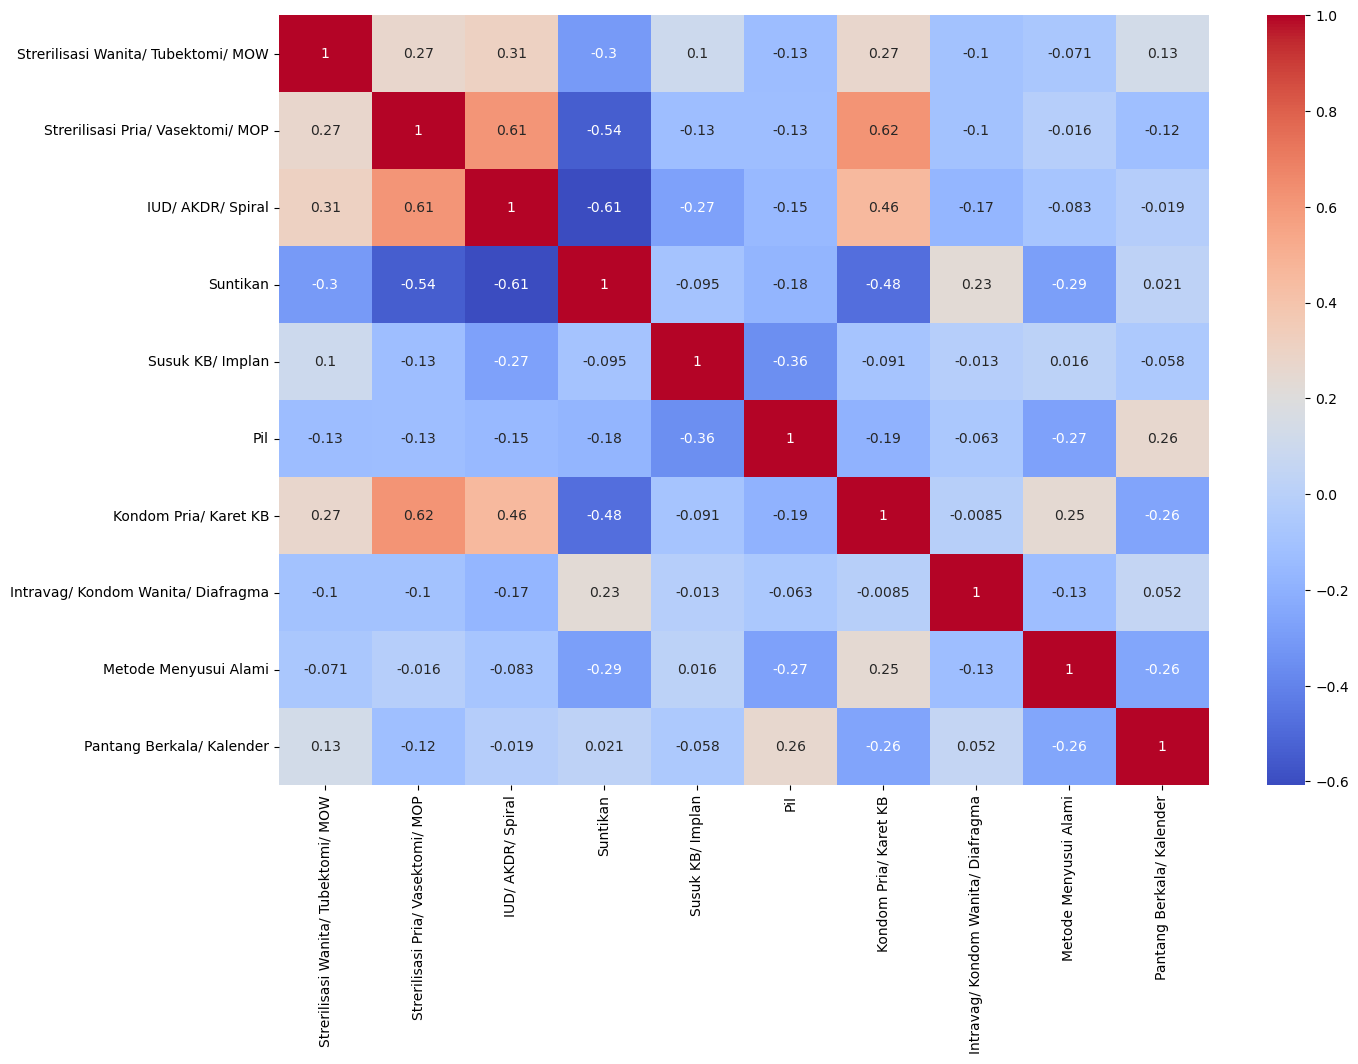

,Strerilisasi Wanita/ Tubektomi/ MOW,Strerilisasi Pria/ Vasektomi/ MOP,IUD/ AKDR/ Spiral,Suntikan,Susuk KB/ Implan,Pil,Kondom Pria/ Karet KB,Intravag/ Kondom Wanita/ Diafragma,Metode Menyusui Alami,Pantang Berkala/ Kalender
Strerilisasi Wanita/ Tubektomi/ MOW,1.000000,0.270833,0.310582,-0.304709,0.101487,-0.133839,0.266320,-0.100057,-0.071336,0.128935
Strerilisasi Pria/ Vasektomi/ MOP,0.270833,1.000000,0.612957,-0.541362,-0.129874,-0.125435,0.619753,-0.103188,-0.016395,-0.123783
IUD/ AKDR/ Spiral,0.310582,0.612957,1.000000,-0.607728,-0.270542,-0.151950,0.457801,-0.170755,-0.083405,-0.019409
Suntikan,-0.304709,-0.541362,-0.607728,1.000000,-0.094598,-0.175468,-0.480407,0.231316,-0.285168,0.020675
Susuk KB/ Implan,0.101487,-0.129874,-0.270542,-0.094598,1.000000,-0.355848,-0.090953,-0.013422,0.015557,-0.057924
Pil,-0.133839,-0.125435,-0.151950,-0.175468,-0.355848,1.000000,-0.189317,-0.062893,-0.272050,0.259624
Kondom Pria/ Karet KB,0.266320,0.619753,0.457801,-0.480407,-0.090953,-0.189317,1.000000,-0.008529,0.245530,-0.258263
Intravag/ Kondom Wanita/ Diafragma,-0.100057,-0.103188,-0.170755,0.231316,-0.013422,-0.062893,-0.008529,1.000000,-0.125414,0.051996
Metode Menyusui Alami,-0.071336,-0.016395,-0.083405,-0.285168,0.015557,-0.272050,0.245530,-0.125414,1.000000,-0.255516
Pantang Berkala/ Kalender,0.128935,-0.123783,-0.019409,0.020675,-0.057924,0.259624,-0.258263,0.051996,-0.255516,1.000000


In [12]:
#korelasi antar variabel
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()


correlation_matrix = numerical_data.corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

### Uji Asumsi Multikolinearitas

In [13]:
# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(len(numerical_data.columns))]

vif_data

,feature,VIF
0,Strerilisasi Wanita/ Tubektomi/ MOW,3.885537
1,Strerilisasi Pria/ Vasektomi/ MOP,7.553384
2,IUD/ AKDR/ Spiral,4.268218
3,Suntikan,9.426829
4,Susuk KB/ Implan,4.227463
5,Pil,5.821145
6,Kondom Pria/ Karet KB,4.727121
7,Intravag/ Kondom Wanita/ Diafragma,1.442424
8,Metode Menyusui Alami,1.448493
9,Pantang Berkala/ Kalender,3.284053


### Scaling Data

In [14]:
#Scaling Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

data_scaled = pd.DataFrame(data_scaled, columns=numerical_data.columns)
data_scaled.head()

,Strerilisasi Wanita/ Tubektomi/ MOW,Strerilisasi Pria/ Vasektomi/ MOP,IUD/ AKDR/ Spiral,Suntikan,Susuk KB/ Implan,Pil,Kondom Pria/ Karet KB,Intravag/ Kondom Wanita/ Diafragma,Metode Menyusui Alami,Pantang Berkala/ Kalender
0,-0.633635,-0.434910,-0.466747,1.339644,-1.015636,-0.189641,-0.746998,-0.393769,-0.182882,-0.759666
1,1.646462,1.076645,-0.563616,-1.007619,0.625757,-0.287393,1.552779,-0.410217,-0.071846,-0.676294
2,0.693795,2.785359,0.437888,-0.761137,0.231762,-0.804452,1.710964,1.267414,0.505537,-0.752997
3,-0.335927,-0.369191,-0.507369,0.244697,-0.601865,0.787883,-0.725704,-0.426664,-0.116260,-0.699639
4,-0.812260,-0.829229,-0.685484,0.822033,-0.391937,0.434173,-0.780460,1.267414,-0.427159,0.914444


# K-Means Clustering

### Elbow Plot

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

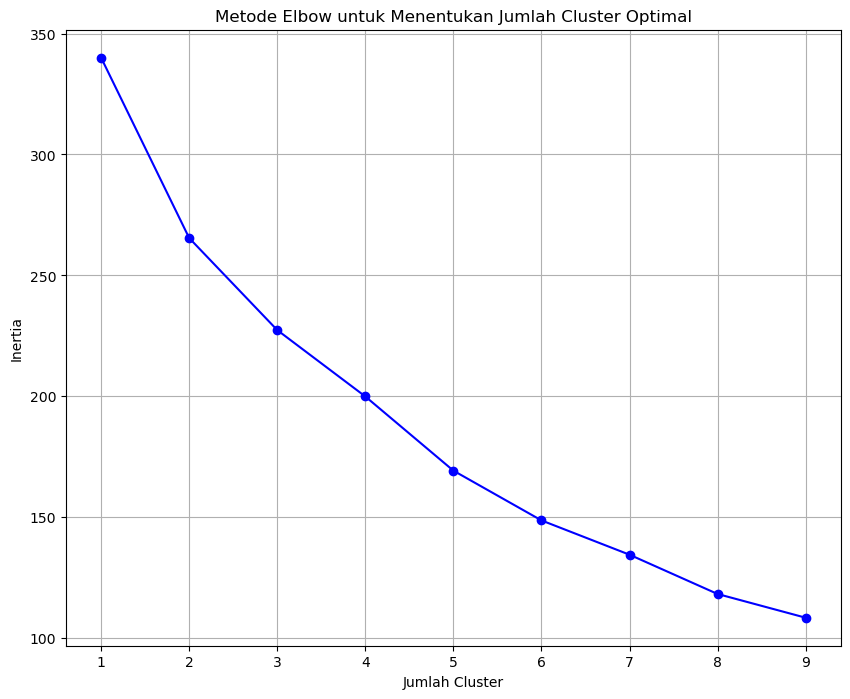

In [15]:
# Menghitung inertia untuk berbagai jumlah cluster
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Membuat plot Elbow
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')  # Menggunakan marker 'o' untuk titik bulat
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)  # Menambahkan grid
plt.show()

### Mencari jumlah klaster terbaik

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette score is : 0.2841889553998246


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, the average silhouette score is : 0.17524864488930358


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette score is : 0.14648853630751577


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5, the average silhouette score is : 0.1590581542208758


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the average silhouette score is : 0.14517747517956042


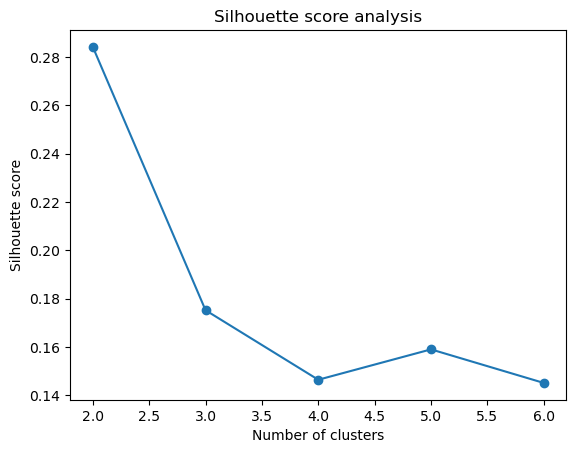

In [16]:
# List untuk menyimpan silhouette scores
silhouette_scores = []

# Range nilai n_clusters yang ingin diuji
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Inisialisasi dan fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)

    # Hitung silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

# Plot hasilnya
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score analysis')
plt.show()


### Clustering menggunakan K-Means

In [19]:
# Menggunakan jumlah cluster yang ditentukan dari elbow
n_clusters = 2
kmeans = KMeans(n_clusters, random_state=42)
labels = kmeans.fit_predict(data_scaled)


# Menambahkan label cluster ke data asli
data['Cluster'] = kmeans.labels_
data.head()

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Provinsi,Strerilisasi Wanita/ Tubektomi/ MOW,Strerilisasi Pria/ Vasektomi/ MOP,IUD/ AKDR/ Spiral,Suntikan,Susuk KB/ Implan,Pil,Kondom Pria/ Karet KB,Intravag/ Kondom Wanita/ Diafragma,Metode Menyusui Alami,Pantang Berkala/ Kalender,Cluster
0,aceh,2.36,0.18,4.43,67.31,5.41,16.76,1.31,0.09,0.15,1.60,0
1,sumatera utara,8.87,0.41,3.81,42.55,16.20,16.00,8.87,0.08,0.20,1.85,1
2,sumatera barat,6.15,0.67,10.22,45.15,13.61,11.98,9.39,1.10,0.46,1.62,1
3,riau,3.21,0.19,4.17,55.76,8.13,24.36,1.38,0.07,0.18,1.78,0
4,jambi,1.85,0.12,3.03,61.85,9.51,21.61,1.20,1.10,0.04,6.62,0


In [20]:
# Melihat jumlah anggota tiap cluster
print(data['Cluster'].value_counts())

Cluster
0    29
1     5
Name: count, dtype: int64


### Melihat hasil pengelompokan

In [21]:
#Anggota Setiap Klaster

clusters = sorted(data['Cluster'].unique())
cluster_data = {cluster: [] for cluster in clusters}

for cluster_num in clusters:
    provinces = data[data['Cluster'] == cluster_num]['Provinsi'].tolist()
    cluster_data[cluster_num] = provinces

max_length = max(len(provinces) for provinces in cluster_data.values())

for cluster_num in clusters:
    cluster_data[cluster_num] += [""] * (max_length - len(cluster_data[cluster_num]))

cluster_df = pd.DataFrame(cluster_data)
cluster_df.columns = [f'Cluster {cluster_num}' for cluster_num in cluster_df.columns]
cluster_df

,Cluster 0,Cluster 1
0,aceh,sumatera utara
1,riau,sumatera barat
2,jambi,dki jakarta
3,sumatera selatan,di yogyakarta
4,bengkulu,bali
5,lampung,
6,kep. bangka belitung,
7,kep. riau,
8,jawa barat,
9,jawa tengah,


In [22]:
# Melihat statistik deskriptif tiap cluster (hanya untuk kolom numerik)
cluster_stats = data.drop(columns=['Provinsi']).groupby('Cluster').mean()
cluster_stats.T

Cluster,0,1
Strerilisasi Wanita/ Tubektomi/ MOW,3.705862,6.856
Strerilisasi Pria/ Vasektomi/ MOP,0.198276,0.524
IUD/ AKDR/ Spiral,5.599310,17.962
Suntikan,55.468276,39.900
Susuk KB/ Implan,12.533793,9.492
Pil,19.085862,13.296
Kondom Pria/ Karet KB,2.708621,9.896
Intravag/ Kondom Wanita/ Diafragma,0.338966,0.274
Metode Menyusui Alami,0.224828,0.276
Pantang Berkala/ Kalender,4.075517,2.732


#### Visualisasi Menggunakan PCA

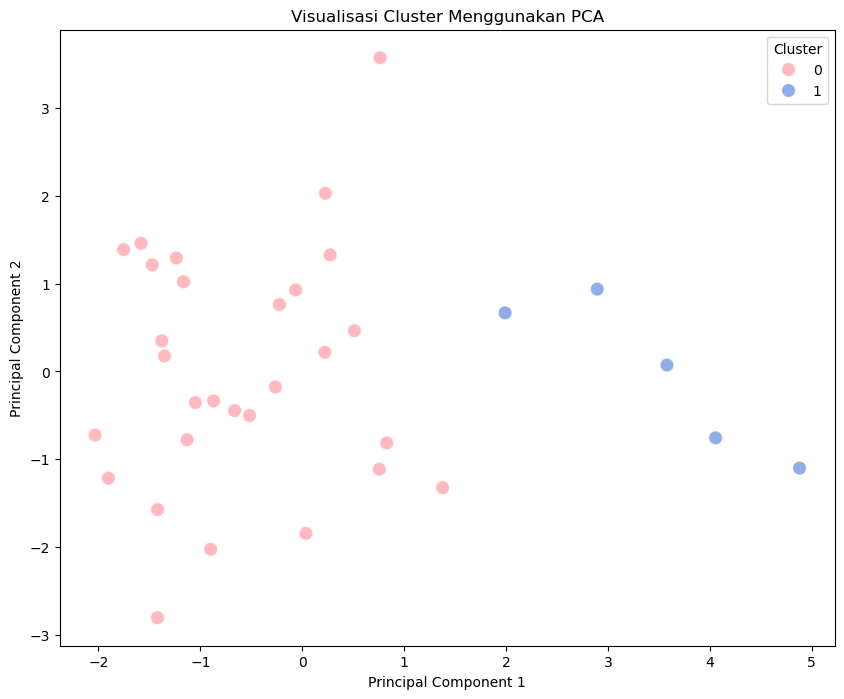

In [23]:
# Menggunakan PCA untuk mereduksi data ke 2 dimensi untuk visualisasi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Definisikan warna untuk setiap cluster
cluster_palette = {0: '#ff9ca4', 1: '#628bdf', 2: '#59b194'}

# Visualisasi cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette=cluster_palette, s=100, alpha=0.7)
plt.title('Visualisasi Cluster Menggunakan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Evaluasi Hasil Clustering

In [24]:
# Menghitung inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

# Menghitung silhouette score
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled, labels)
print(f'Davies-Bouldin Index: {db_index}')

Inertia: 265.4398463920985
Silhouette Score: 0.2841889553998246
Davies-Bouldin Index: 1.2198111885584406


#### Mapping

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15328\303918376.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_results['Provinsi'] = clustering_results['Provinsi'].str.lower()


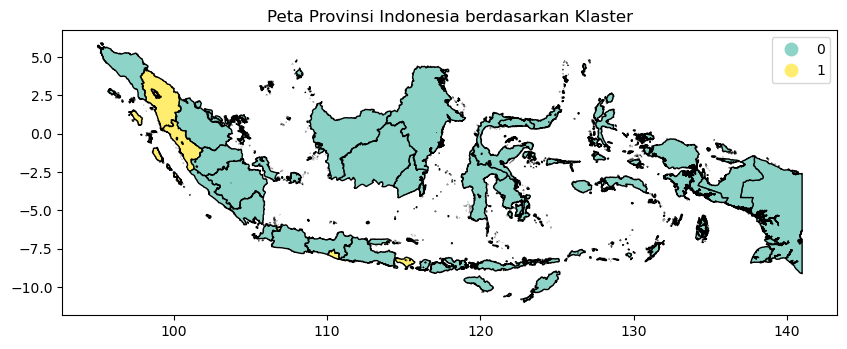

In [25]:
# Ambil data provinsi Indonesia

clustering_results = data[['Provinsi','Cluster']]

# Baca data geospasial untuk provinsi di Indonesia
gdf = gpd.read_file('https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json')
gdf['Propinsi'] = gdf['Propinsi'].str.lower() 

# Dictionary untuk mapping dari nama lama ke nama baru
mapping = {
    'irian jaya timur': 'Papua',
    'nusatenggara barat': 'Nusa Tenggara Barat',
    'gorontalo': 'Gorontalo',
    'sulawesi tenggara': 'Sulawesi Tenggara',
    'daerah istimewa yogyakarta': 'DI Yogyakarta',
    'jawa tengah': 'Jawa Tengah',
    'probanten': 'Banten',
    'jawa timur': 'Jawa Timur',
    'maluku utara': 'Maluku Utara',
    'maluku': 'Maluku',
    'kalimantan selatan': 'Kalimantan Selatan',
    'kalimantan barat': 'Kalimantan Barat',
    'sulawesi selatan': 'Sulawesi Selatan',
    'dki jakarta': 'DKI Jakarta',
    'jawa barat': 'Jawa Barat',
    'irian jaya tengah': 'Papua',
    'nusa tenggara timur': 'Nusa Tenggara Timur',
    'bali': 'Bali',
    'riau': 'Riau',
    'sulawesi tengah': 'Sulawesi Tengah',
    'kalimantan timur': 'Kalimantan Timur',
    'sulawesi utara': 'Sulawesi Utara',
    'irian jaya barat': 'Papua Barat',
    'sumatera utara': 'Sumatera Utara',
    'bangka belitung': 'Kep. Bangka Belitung',
    'sumatera barat': 'Sumatera Barat',
    'kalimantan tengah': 'Kalimantan Tengah',
    'sumatera selatan': 'Sumatera Selatan',
    'jambi': 'Jambi',
    'lampung': 'Lampung',
    'bengkulu': 'Bengkulu',
    'di. aceh': 'Aceh'
}

# Menggunakan metode replace untuk melakukan renaming
gdf['Propinsi'] = gdf['Propinsi'].replace(mapping)

gdf['Propinsi'] = gdf['Propinsi'].str.lower()
clustering_results['Provinsi'] = clustering_results['Provinsi'].str.lower()

# Ubah nama kolom 'Propinsi' menjadi 'Province'
gdf = gdf.rename(columns={'Propinsi': 'Provinsi'})

# Gabungkan data GeoJSON dengan hasil clustering
gdf = gdf.merge(clustering_results, on='Provinsi', how='left')

# Visualisasikan peta provinsi dengan warna berdasarkan klaster
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Cluster', categorical=True, legend=True, ax=ax, cmap='Set3', edgecolor='black')
ax.set_title('Peta Provinsi Indonesia berdasarkan Klaster')
plt.show()

# Fuzzy C-Means

In [26]:
# !pip install scikit-fuzzy

### Elbow Plot

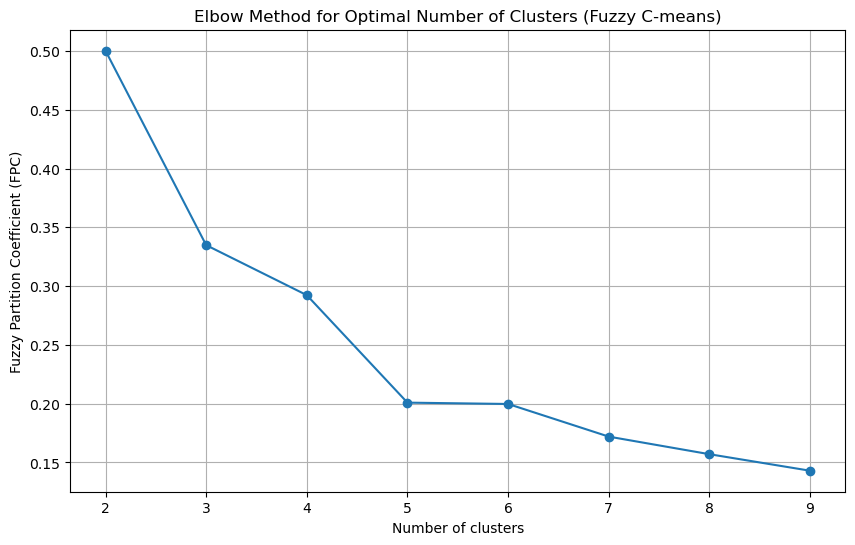

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

# Range nilai n_clusters yang ingin diuji
range_n_clusters = np.arange(2, 10)

# List untuk menyimpan FPC
fpcs = []

for n_clusters in range_n_clusters:
    # Inisialisasi Fuzzy C-means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_scaled.T, n_clusters, m=2, error=0.005, maxiter=1000, init=None
    )
    
    # Menyimpan nilai FPC
    fpcs.append(fpc)

# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, fpcs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('Elbow Method for Optimal Number of Clusters (Fuzzy C-means)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


### Mencari jumlah cluster dan parameter terbaik

In [28]:
# Contoh inisialisasi dataset
# List untuk menyimpan silhouette scores
silhouette_scores = []
best_score = -1
best_params = None

# Range nilai n_clusters yang ingin diuji
range_n_clusters = [2, 3, 4, 5, 6]

# Range nilai fuzziness coefficient (m)
range_m = [1.1, 1.5, 2.0]

for n_clusters in range_n_clusters:
    for m in range_m:
        # Inisialisasi Fuzzy C-means
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            data_scaled.T, n_clusters, m, error=0.005, maxiter=1000, init=None
        )

        # Menentukan label cluster
        cluster_labels = np.argmax(u, axis=0)

        # Hitung silhouette score
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters} and m = {m}, the average silhouette score is : {silhouette_avg}")

        # Memilih parameter terbaik berdasarkan silhouette score tertinggi
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = (n_clusters, m)

print(f"Best parameters: n_clusters={best_params[0]}, m={best_params[1]} with silhouette score: {best_score}")


For n_clusters = 2 and m = 1.1, the average silhouette score is : 0.25447034794105194
For n_clusters = 2 and m = 1.5, the average silhouette score is : 0.20476290484918463
For n_clusters = 2 and m = 2.0, the average silhouette score is : 0.16036066849336644
For n_clusters = 3 and m = 1.1, the average silhouette score is : 0.17820311894218158
For n_clusters = 3 and m = 1.5, the average silhouette score is : 0.1498845887428577
For n_clusters = 3 and m = 2.0, the average silhouette score is : 0.007893341621675992
For n_clusters = 4 and m = 1.1, the average silhouette score is : 0.15509000994239922
For n_clusters = 4 and m = 1.5, the average silhouette score is : 0.1501863695420073
For n_clusters = 4 and m = 2.0, the average silhouette score is : 0.12192381989336401
For n_clusters = 5 and m = 1.1, the average silhouette score is : 0.1433827037776512
For n_clusters = 5 and m = 1.5, the average silhouette score is : 0.13005042373139042
For n_clusters = 5 and m = 2.0, the average silhouette s

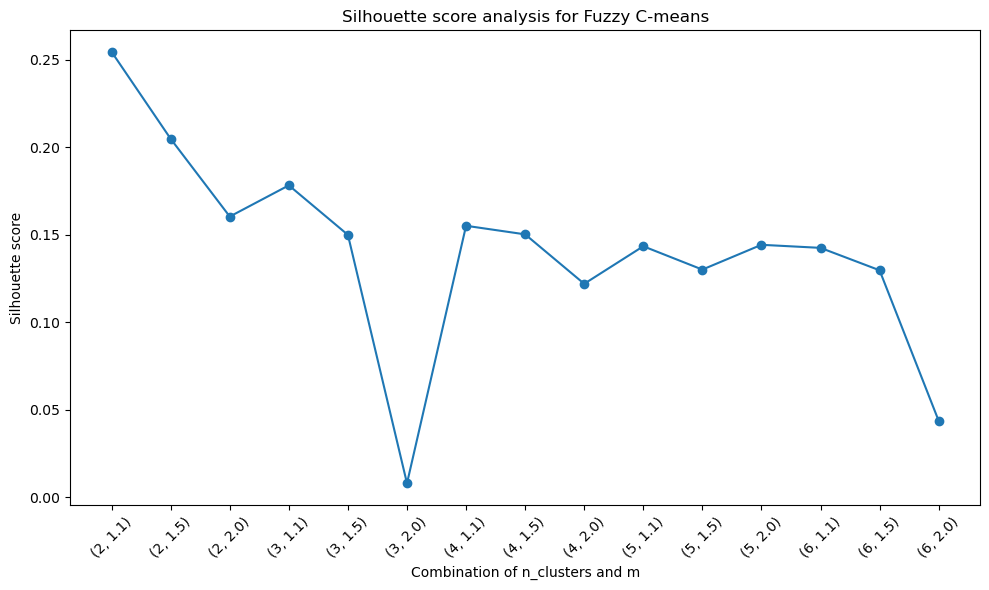

In [29]:
# Plot hasilnya
plt.figure(figsize=(10, 6))  # Ukuran plot
plt.plot(np.arange(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xticks(np.arange(len(silhouette_scores)), 
           [(n, m) for n in range_n_clusters for m in range_m],  # Label sumbu x
           rotation=45)
plt.xlabel('Combination of n_clusters and m')
plt.ylabel('Silhouette score')
plt.title('Silhouette score analysis for Fuzzy C-means')
plt.tight_layout()
plt.show()


### Fuzzy C-means

In [30]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Fuzzy C-Means
ncenters = 2
results = fuzz.cluster.cmeans(data_scaled.T, ncenters, 1.1, error=0.001, maxiter=1000)
cntr = results[0]
u = results[1]
fpc = results[6]
fpc

0.9826482518252464

### Hasil Cluster

In [31]:
# Mendapatkan labels kluster
cluster_membership = u.argmax(axis=0)

# Tambahkan kolom 'Cluster' ke data asli
data['Cluster'] = cluster_membership

# Melihat jumlah anggota tiap cluster
print(data['Cluster'].value_counts())

Cluster
1    28
0     6
Name: count, dtype: int64


In [32]:
#Anggota Setiap Klaster

clusters = sorted(data['Cluster'].unique())
cluster_data = {cluster: [] for cluster in clusters}

for cluster_num in clusters:
    provinces = data[data['Cluster'] == cluster_num]['Provinsi'].tolist()
    cluster_data[cluster_num] = provinces

max_length = max(len(provinces) for provinces in cluster_data.values())

for cluster_num in clusters:
    cluster_data[cluster_num] += [""] * (max_length - len(cluster_data[cluster_num]))

cluster_df = pd.DataFrame(cluster_data)
cluster_df.columns = [f'Cluster {cluster_num}' for cluster_num in cluster_df.columns]
cluster_df

,Cluster 0,Cluster 1
0,sumatera utara,aceh
1,sumatera barat,riau
2,kep. riau,jambi
3,dki jakarta,sumatera selatan
4,di yogyakarta,bengkulu
5,bali,lampung
6,,kep. bangka belitung
7,,jawa barat
8,,jawa tengah
9,,jawa timur


In [33]:
# Melihat statistik deskriptif tiap cluster (hanya untuk kolom numerik)
cluster_stats = data.drop(columns=['Provinsi']).groupby('Cluster').mean()
cluster_stats.T

Cluster,0,1
Strerilisasi Wanita/ Tubektomi/ MOW,7.006667,3.561071
Strerilisasi Pria/ Vasektomi/ MOP,0.495000,0.192857
IUD/ AKDR/ Spiral,17.016667,5.360357
Suntikan,40.176667,55.965000
Susuk KB/ Implan,9.128333,12.720357
Pil,14.356667,19.065357
Kondom Pria/ Karet KB,8.713333,2.705357
Intravag/ Kondom Wanita/ Diafragma,0.228333,0.351071
Metode Menyusui Alami,0.230000,0.232857
Pantang Berkala/ Kalender,3.136667,4.036786


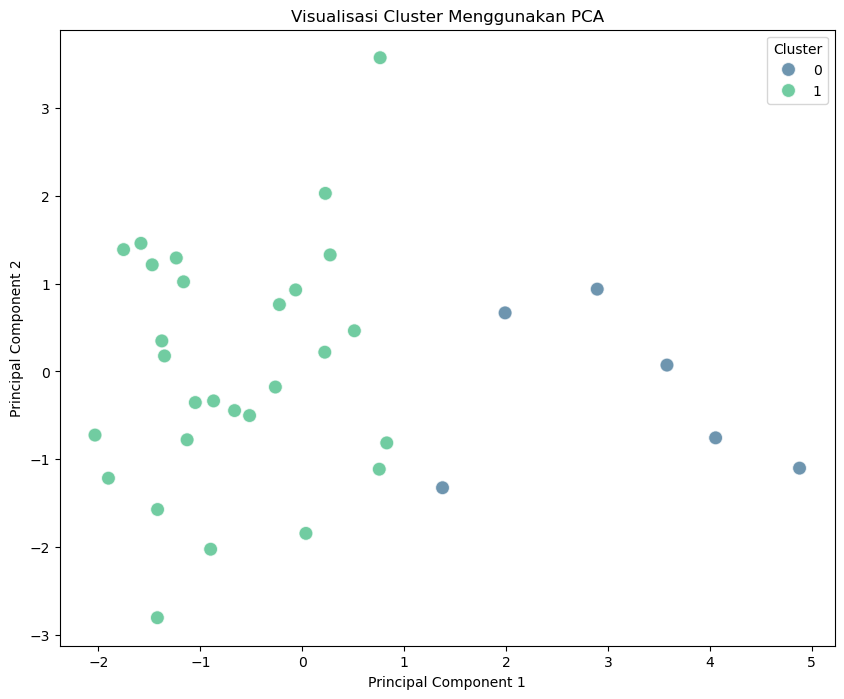

In [34]:
# Menggunakan PCA untuk mereduksi data ke 2 dimensi untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Visualisasi cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster Menggunakan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Evaluasi 

In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Misalkan Anda sudah memiliki variabel u (fuzzy partition matrix) dan cntr (cluster centers)
# Hitung Silhouette Score
silhouette_avg = silhouette_score(data_scaled, np.argmax(u, axis=0))
print(f'Silhouette Score: {silhouette_avg}')

# Hitung Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled, np.argmax(u, axis=0))
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.25447034794105194
Davies-Bouldin Index: 1.3290988487278814


In [36]:
# Print provinces in each cluster
clusters = data['Cluster'].unique()
for cluster_num in clusters:
    provinces = data[data['Cluster'] == cluster_num]['Provinsi'].tolist()
    print(f"\nProvinsi di kluster {cluster_num}:")
    print(provinces)


Provinsi di kluster 1:
['aceh', 'riau', 'jambi', 'sumatera selatan', 'bengkulu', 'lampung', 'kep. bangka belitung', 'jawa barat', 'jawa tengah', 'jawa timur', 'banten', 'nusa tenggara barat', 'nusa tenggara timur', 'kalimantan barat', 'kalimantan tengah', 'kalimantan selatan', 'kalimantan timur', 'kalimantan utara', 'sulawesi utara', 'sulawesi tengah', 'sulawesi selatan', 'sulawesi tenggara', 'gorontalo', 'sulawesi barat', 'maluku', 'maluku utara', 'papua barat', 'papua']

Provinsi di kluster 0:
['sumatera utara', 'sumatera barat', 'kep. riau', 'dki jakarta', 'di yogyakarta', 'bali']


### Mapping

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15328\303918376.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_results['Provinsi'] = clustering_results['Provinsi'].str.lower()


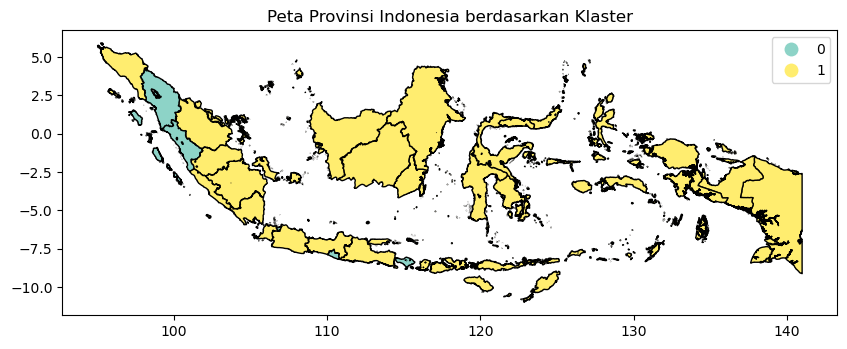

In [37]:
# Ambil data provinsi Indonesia

clustering_results = data[['Provinsi','Cluster']]

# Baca data geospasial untuk provinsi di Indonesia
gdf = gpd.read_file('https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json')
gdf['Propinsi'] = gdf['Propinsi'].str.lower() 

# Dictionary untuk mapping dari nama lama ke nama baru
mapping = {
    'irian jaya timur': 'Papua',
    'nusatenggara barat': 'Nusa Tenggara Barat',
    'gorontalo': 'Gorontalo',
    'sulawesi tenggara': 'Sulawesi Tenggara',
    'daerah istimewa yogyakarta': 'DI Yogyakarta',
    'jawa tengah': 'Jawa Tengah',
    'probanten': 'Banten',
    'jawa timur': 'Jawa Timur',
    'maluku utara': 'Maluku Utara',
    'maluku': 'Maluku',
    'kalimantan selatan': 'Kalimantan Selatan',
    'kalimantan barat': 'Kalimantan Barat',
    'sulawesi selatan': 'Sulawesi Selatan',
    'dki jakarta': 'DKI Jakarta',
    'jawa barat': 'Jawa Barat',
    'irian jaya tengah': 'Papua',
    'nusa tenggara timur': 'Nusa Tenggara Timur',
    'bali': 'Bali',
    'riau': 'Riau',
    'sulawesi tengah': 'Sulawesi Tengah',
    'kalimantan timur': 'Kalimantan Timur',
    'sulawesi utara': 'Sulawesi Utara',
    'irian jaya barat': 'Papua Barat',
    'sumatera utara': 'Sumatera Utara',
    'bangka belitung': 'Kep. Bangka Belitung',
    'sumatera barat': 'Sumatera Barat',
    'kalimantan tengah': 'Kalimantan Tengah',
    'sumatera selatan': 'Sumatera Selatan',
    'jambi': 'Jambi',
    'lampung': 'Lampung',
    'bengkulu': 'Bengkulu',
    'di. aceh': 'Aceh'
}

# Menggunakan metode replace untuk melakukan renaming
gdf['Propinsi'] = gdf['Propinsi'].replace(mapping)

gdf['Propinsi'] = gdf['Propinsi'].str.lower()
clustering_results['Provinsi'] = clustering_results['Provinsi'].str.lower()

# Ubah nama kolom 'Propinsi' menjadi 'Province'
gdf = gdf.rename(columns={'Propinsi': 'Provinsi'})

# Gabungkan data GeoJSON dengan hasil clustering
gdf = gdf.merge(clustering_results, on='Provinsi', how='left')

# Visualisasikan peta provinsi dengan warna berdasarkan klaster
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Cluster', categorical=True, legend=True, ax=ax, cmap='Set3', edgecolor='black')
ax.set_title('Peta Provinsi Indonesia berdasarkan Klaster')
plt.show()

## Hierarki Clustering (Ward's Method)

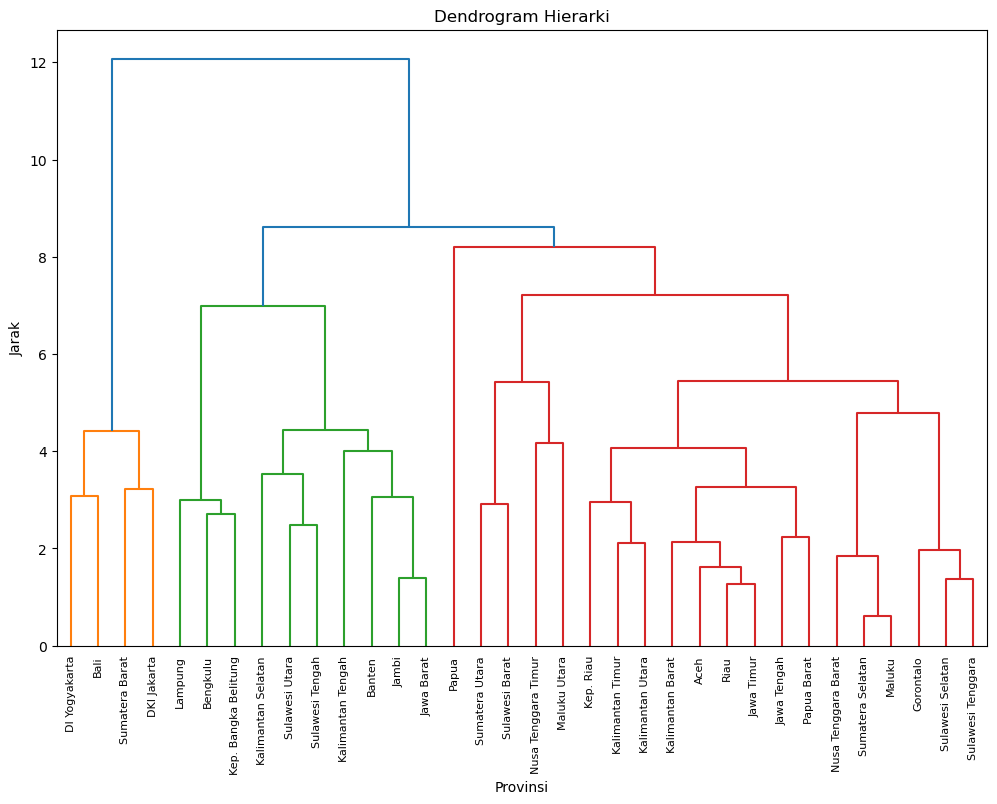

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Hierarchical clustering dengan metode Ward dan Euclidean distance
Z = linkage(data_scaled, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df['Provinsi'].values, orientation='top', leaf_rotation=90)
plt.title('Dendrogram Hierarki')
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.show()

In [40]:
# Melihat statistik deskriptif tiap cluster (hanya untuk kolom numerik)
cluster_stats = data.drop(columns=['Provinsi']).groupby('Cluster').mean()
cluster_stats.T

Cluster,0,1
Strerilisasi Wanita/ Tubektomi/ MOW,3.705862,6.856
Strerilisasi Pria/ Vasektomi/ MOP,0.198276,0.524
IUD/ AKDR/ Spiral,5.599310,17.962
Suntikan,55.468276,39.900
Susuk KB/ Implan,12.533793,9.492
Pil,19.085862,13.296
Kondom Pria/ Karet KB,2.708621,9.896
Intravag/ Kondom Wanita/ Diafragma,0.338966,0.274
Metode Menyusui Alami,0.224828,0.276
Pantang Berkala/ Kalender,4.075517,2.732


### Evaluasi Hasil Cluster

In [41]:
from scipy.cluster.hierarchy import linkage, cophenet,fcluster
from scipy.spatial.distance import pdist

X = data_scaled

Z = linkage(X, method='ward', metric='euclidean')
c, coph_dists = cophenet(Z, pdist(X))

print(f"Cophenetic Correlation Coefficient: {c}")


Cophenetic Correlation Coefficient: 0.6930202134499819


In [42]:
from sklearn.metrics import silhouette_score

k = 2
# Mendapatkan label cluster menggunakan fungsi fcluster
labels = fcluster(Z, k, criterion='maxclust')

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score untuk {k} cluster: {silhouette_avg}")


Silhouette Score untuk 2 cluster: 0.310018662153544


### Perbandingan

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

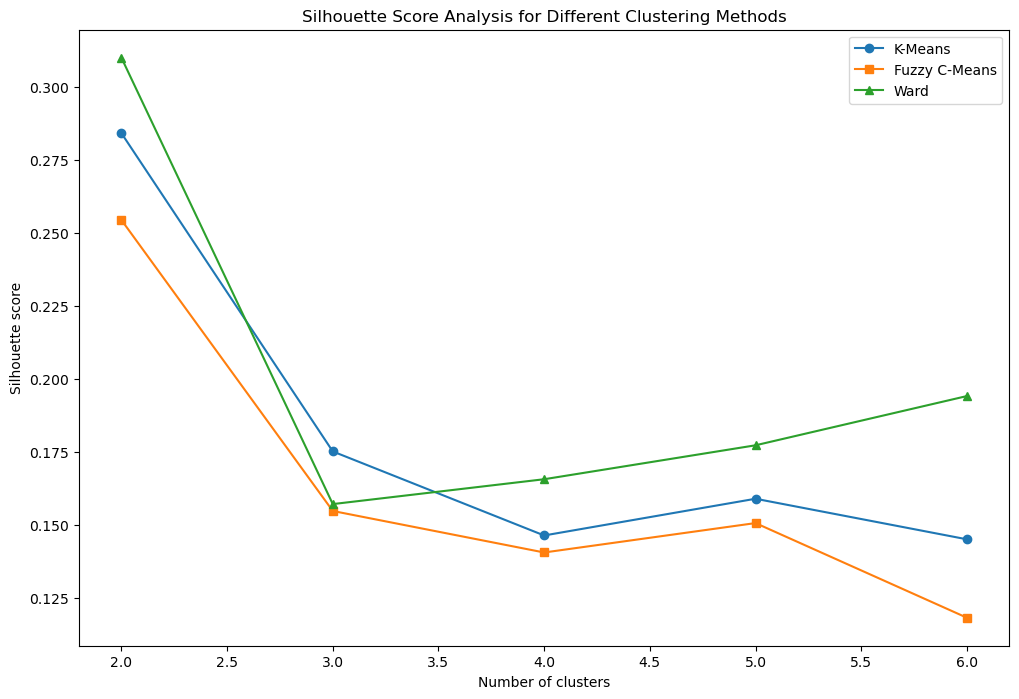

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import skfuzzy as fuzz
from scipy.cluster.hierarchy import linkage, fcluster

# K-Means clustering
kmeans_silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)

# Fuzzy C-Means clustering
fcm_silhouette_scores = []
n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_scaled.T, n_clusters, 1.1, error=0.005, maxiter=1000)
    cluster_labels = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    fcm_silhouette_scores.append(silhouette_avg)

# Hierarchical clustering
hierarchical_silhouette_scores = []
Z = linkage(data_scaled, 'ward')
for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(data_scaled, labels)
    hierarchical_silhouette_scores.append(silhouette_avg)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(range_n_clusters, kmeans_silhouette_scores, marker='o', label='K-Means')
plt.plot(range_n_clusters, fcm_silhouette_scores, marker='s', label='Fuzzy C-Means')
plt.plot(range_n_clusters, hierarchical_silhouette_scores, marker='^', label='Ward')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Analysis for Different Clustering Methods')
plt.legend()
plt.show()
